In [1]:
#!python -m pip install scrublet
#!python -m pip install pandas

In [2]:
%matplotlib inline
import scrublet as scr
import scipy.io
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os

In [3]:
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Arial'
plt.rc('font', size=14)
plt.rcParams['pdf.fonttype'] = 42

In [4]:
# sample filtered bc matrix are in 
#/g/data/pq08/projects/ppgl/a5/sn_rna_seq/analysis/cellranger_hg38/<SAMPLE>/outs/filtered_feature_bc_matrix


In [5]:
# set save = True to save a csv with the doublet scores and predictions for each cell
def scrub_func(sample_name, 
               exp_doublets=0.06, 
               thresh = 0, 
               sim_ratio = 2, 
               save = False):
    input_dir = '/g/data/pq08/projects/ppgl/a5/sn_rna_seq/analysis/cellranger_hg38/intronic_counted/{}/outs/filtered_feature_bc_matrix'.format(sample_name)
    print('Using input directory: '+ input_dir)
    counts_matrix = scipy.io.mmread(input_dir + '/matrix.mtx').T.tocsc()
    genes = np.array(scr.load_genes(input_dir + '/features.tsv',
                                    delimiter='\t', 
                                    column=1))
    print('Counts matrix shape: {} rows, {} columns'.format(counts_matrix.shape[0],
                                                            counts_matrix.shape[1]))
    print('Number of genes in gene list: {}'.format(len(genes)))
    scrub = scr.Scrublet(counts_matrix,
                         expected_doublet_rate=exp_doublets,
                         sim_doublet_ratio = sim_ratio)
    doublet_scores, predicted_doublets = scrub.scrub_doublets(min_counts=2,
                                                              min_cells=3,
                                                              min_gene_variability_pctl=85,
                                                              n_prin_comps=30)
    if thresh != 0:
        scrub.call_doublets(threshold = thresh)
    scrub.plot_histogram();
    print('Running UMAP...')
    scrub.set_embedding('UMAP', scr.get_umap(scrub.manifold_obs_, 10, min_dist=0.3))
    print('Done.')
    scrub.plot_embedding('UMAP', order_points=True);
    if save == True:
        df = pd.DataFrame({
            'doublet_score': scrub.doublet_scores_obs_,
            'predicted_doublet': scrub.predicted_doublets_
        })
        df.to_csv('/g/data/pq08/projects/ppgl/a5/sn_rna_seq/analysis/scrublet/hg38/intronic_counted/{}_scrublet_output_table.csv'.format(sample_name), index=False)  

Using input directory: /g/data/pq08/projects/ppgl/a5/sn_rna_seq/analysis/cellranger_hg38/intronic_counted/E018/outs/filtered_feature_bc_matrix
Counts matrix shape: 5301 rows, 36601 columns
Number of genes in gene list: 36601
Preprocessing...
Simulating doublets...
Embedding transcriptomes using PCA...
Calculating doublet scores...
Automatically set threshold at doublet score = 0.59
Detected doublet rate = 0.0%
Estimated detectable doublet fraction = 0.4%
Overall doublet rate:
	Expected   = 6.0%
	Estimated  = 0.0%
Elapsed time: 11.4 seconds
Detected doublet rate = 5.6%
Estimated detectable doublet fraction = 32.8%
Overall doublet rate:
	Expected   = 6.0%
	Estimated  = 17.0%
Running UMAP...


/home/563/af6764/.local/lib/python3.9/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


Done.


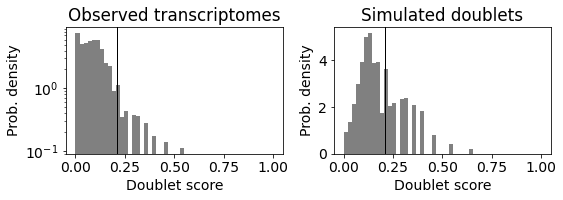

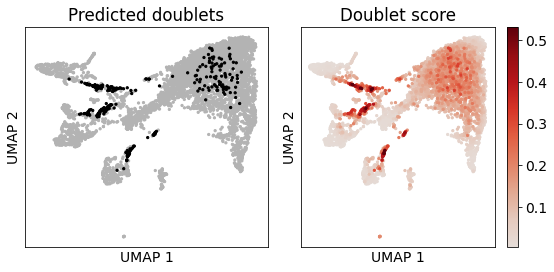

In [24]:
scrub_func("E018", save=True, thresh=0.21)

Using input directory: /g/data/pq08/projects/ppgl/a5/sn_rna_seq/analysis/cellranger_hg38/intronic_counted/E019-1/outs/filtered_feature_bc_matrix
Counts matrix shape: 4840 rows, 36601 columns
Number of genes in gene list: 36601
Preprocessing...
Simulating doublets...
Embedding transcriptomes using PCA...
Calculating doublet scores...
Automatically set threshold at doublet score = 0.27
Detected doublet rate = 1.0%
Estimated detectable doublet fraction = 7.7%
Overall doublet rate:
	Expected   = 6.0%
	Estimated  = 12.6%
Elapsed time: 5.8 seconds
Detected doublet rate = 1.2%
Estimated detectable doublet fraction = 8.4%
Overall doublet rate:
	Expected   = 6.0%
	Estimated  = 14.5%
Running UMAP...


/home/563/af6764/.local/lib/python3.9/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


Done.


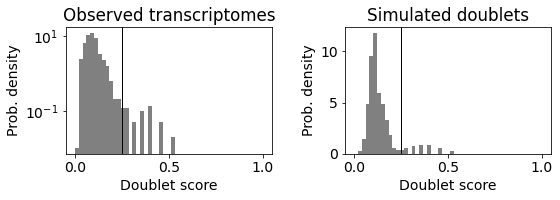

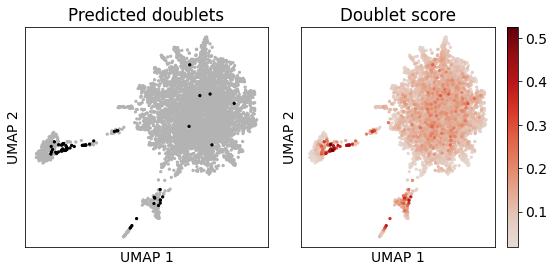

In [7]:
scrub_func("E019-1", thresh=0.25, save=True)

Using input directory: /g/data/pq08/projects/ppgl/a5/sn_rna_seq/analysis/cellranger_hg38/intronic_counted/E123-1/outs/filtered_feature_bc_matrix
Counts matrix shape: 6765 rows, 36601 columns
Number of genes in gene list: 36601
Preprocessing...
Simulating doublets...
Embedding transcriptomes using PCA...
Calculating doublet scores...
Automatically set threshold at doublet score = 0.64
Detected doublet rate = 0.0%
Estimated detectable doublet fraction = 0.3%
Overall doublet rate:
	Expected   = 6.0%
	Estimated  = 9.8%
Elapsed time: 12.6 seconds
Detected doublet rate = 1.8%
Estimated detectable doublet fraction = 14.6%
Overall doublet rate:
	Expected   = 6.0%
	Estimated  = 12.4%
Running UMAP...


/home/563/af6764/.local/lib/python3.9/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


Done.


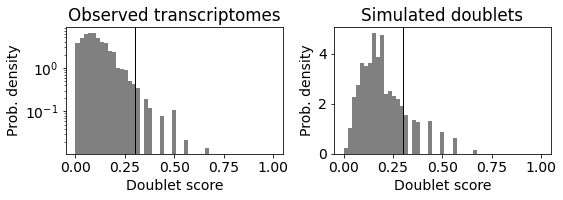

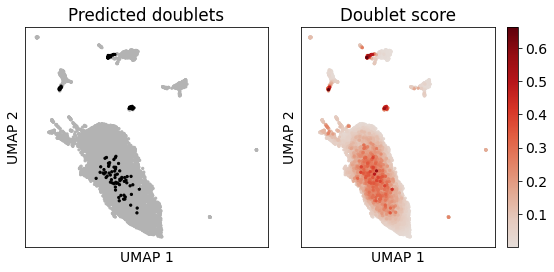

In [8]:
scrub_func("E123-1", save=True, thresh=0.3)

Using input directory: /g/data/pq08/projects/ppgl/a5/sn_rna_seq/analysis/cellranger_hg38/intronic_counted/E140-1/outs/filtered_feature_bc_matrix
Counts matrix shape: 10591 rows, 36601 columns
Number of genes in gene list: 36601
Preprocessing...
Simulating doublets...
Embedding transcriptomes using PCA...
Calculating doublet scores...
Automatically set threshold at doublet score = 0.68
Detected doublet rate = 0.0%
Estimated detectable doublet fraction = 0.4%
Overall doublet rate:
	Expected   = 6.0%
	Estimated  = 5.3%
Elapsed time: 26.5 seconds
Detected doublet rate = 1.9%
Estimated detectable doublet fraction = 17.3%
Overall doublet rate:
	Expected   = 6.0%
	Estimated  = 10.7%
Running UMAP...


/home/563/af6764/.local/lib/python3.9/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


Done.


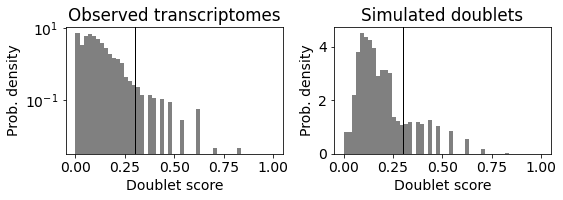

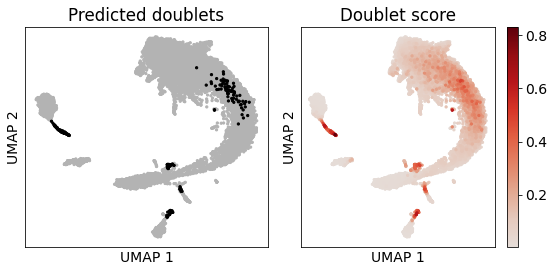

In [9]:
scrub_func("E140-1", thresh=0.3 ,save=True)

Using input directory: /g/data/pq08/projects/ppgl/a5/sn_rna_seq/analysis/cellranger_hg38/intronic_counted/E143-1/outs/filtered_feature_bc_matrix
Counts matrix shape: 9750 rows, 36601 columns
Number of genes in gene list: 36601
Preprocessing...
Simulating doublets...
Embedding transcriptomes using PCA...
Calculating doublet scores...
Automatically set threshold at doublet score = 0.57
Detected doublet rate = 0.0%
Estimated detectable doublet fraction = 0.4%
Overall doublet rate:
	Expected   = 6.0%
	Estimated  = 9.4%
Elapsed time: 22.6 seconds
Detected doublet rate = 3.0%
Estimated detectable doublet fraction = 16.1%
Overall doublet rate:
	Expected   = 6.0%
	Estimated  = 18.7%
Running UMAP...


/home/563/af6764/.local/lib/python3.9/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


Done.


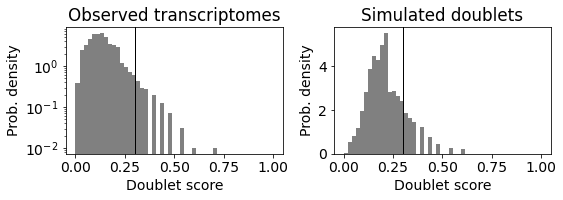

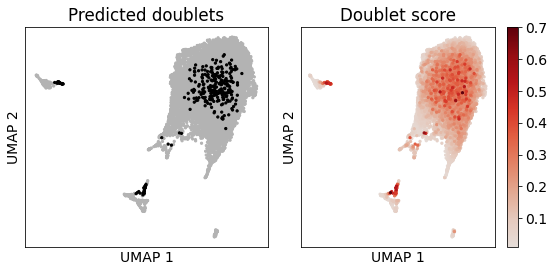

In [10]:
scrub_func("E143-1", thresh = 0.3, save=True)

Using input directory: /g/data/pq08/projects/ppgl/a5/sn_rna_seq/analysis/cellranger_hg38/intronic_counted/E146-1/outs/filtered_feature_bc_matrix
Counts matrix shape: 6557 rows, 36601 columns
Number of genes in gene list: 36601
Preprocessing...
Simulating doublets...
Embedding transcriptomes using PCA...
Calculating doublet scores...
Automatically set threshold at doublet score = 0.61
Detected doublet rate = 0.1%
Estimated detectable doublet fraction = 1.6%
Overall doublet rate:
	Expected   = 6.0%
	Estimated  = 5.6%
Elapsed time: 13.0 seconds
Detected doublet rate = 2.8%
Estimated detectable doublet fraction = 22.3%
Overall doublet rate:
	Expected   = 6.0%
	Estimated  = 12.4%
Running UMAP...


/home/563/af6764/.local/lib/python3.9/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


Done.


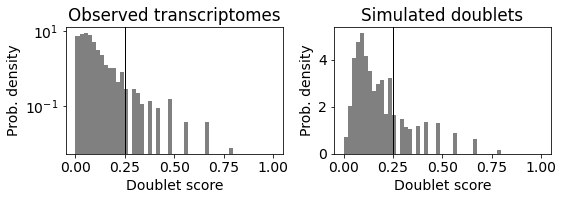

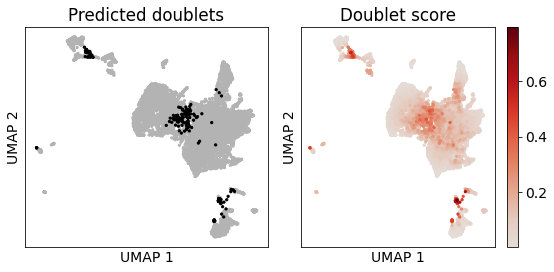

In [11]:
scrub_func("E146-1", save=True, thresh=0.25)

Using input directory: /g/data/pq08/projects/ppgl/a5/sn_rna_seq/analysis/cellranger_hg38/intronic_counted/E156-1/outs/filtered_feature_bc_matrix
Counts matrix shape: 5993 rows, 36601 columns
Number of genes in gene list: 36601
Preprocessing...
Simulating doublets...
Embedding transcriptomes using PCA...
Calculating doublet scores...
Automatically set threshold at doublet score = 0.32
Detected doublet rate = 1.9%
Estimated detectable doublet fraction = 25.5%
Overall doublet rate:
	Expected   = 6.0%
	Estimated  = 7.4%
Elapsed time: 12.4 seconds
Running UMAP...


/home/563/af6764/.local/lib/python3.9/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


Done.


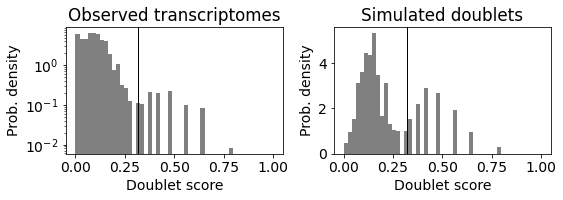

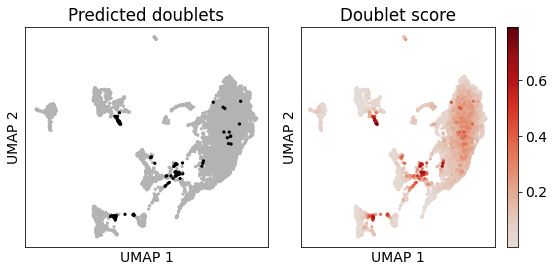

In [12]:
scrub_func("E156-1", save=True)

Using input directory: /g/data/pq08/projects/ppgl/a5/sn_rna_seq/analysis/cellranger_hg38/intronic_counted/E166-1/outs/filtered_feature_bc_matrix
Counts matrix shape: 7031 rows, 36601 columns
Number of genes in gene list: 36601
Preprocessing...
Simulating doublets...
Embedding transcriptomes using PCA...
Calculating doublet scores...
Automatically set threshold at doublet score = 0.63
Detected doublet rate = 0.0%
Estimated detectable doublet fraction = 0.6%
Overall doublet rate:
	Expected   = 6.0%
	Estimated  = 4.7%
Elapsed time: 13.9 seconds
Detected doublet rate = 2.3%
Estimated detectable doublet fraction = 15.3%
Overall doublet rate:
	Expected   = 6.0%
	Estimated  = 15.0%
Running UMAP...


/home/563/af6764/.local/lib/python3.9/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


Done.


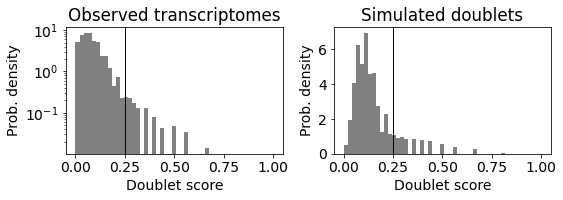

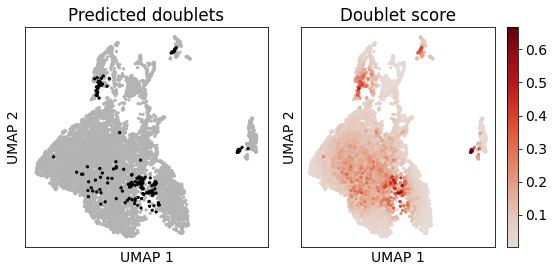

In [13]:
scrub_func("E166-1", save=True, thresh=0.25)

Using input directory: /g/data/pq08/projects/ppgl/a5/sn_rna_seq/analysis/cellranger_hg38/intronic_counted/E171-1/outs/filtered_feature_bc_matrix
Counts matrix shape: 10240 rows, 36601 columns
Number of genes in gene list: 36601
Preprocessing...
Simulating doublets...
Embedding transcriptomes using PCA...
Calculating doublet scores...
Automatically set threshold at doublet score = 0.66
Detected doublet rate = 0.0%
Estimated detectable doublet fraction = 0.6%
Overall doublet rate:
	Expected   = 6.0%
	Estimated  = 3.4%
Elapsed time: 29.0 seconds
Detected doublet rate = 1.1%
Estimated detectable doublet fraction = 9.0%
Overall doublet rate:
	Expected   = 6.0%
	Estimated  = 12.0%
Running UMAP...


/home/563/af6764/.local/lib/python3.9/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


Done.


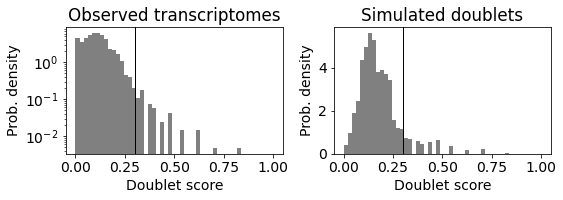

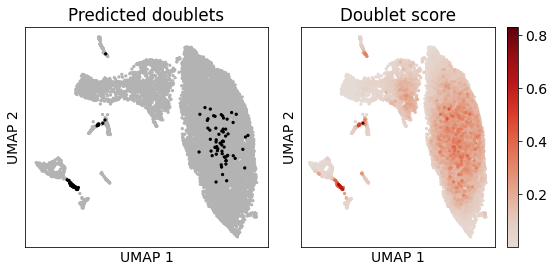

In [14]:
scrub_func("E171-1", thresh=0.3, save=True)

Using input directory: /g/data/pq08/projects/ppgl/a5/sn_rna_seq/analysis/cellranger_hg38/intronic_counted/E197-1/outs/filtered_feature_bc_matrix
Counts matrix shape: 3950 rows, 36601 columns
Number of genes in gene list: 36601
Preprocessing...
Simulating doublets...
Embedding transcriptomes using PCA...
Calculating doublet scores...
Automatically set threshold at doublet score = 0.47
Detected doublet rate = 0.3%
Estimated detectable doublet fraction = 1.1%
Overall doublet rate:
	Expected   = 6.0%
	Estimated  = 26.2%
Elapsed time: 6.0 seconds
Detected doublet rate = 10.2%
Estimated detectable doublet fraction = 30.2%
Overall doublet rate:
	Expected   = 6.0%
	Estimated  = 33.6%
Running UMAP...


/home/563/af6764/.local/lib/python3.9/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


Done.


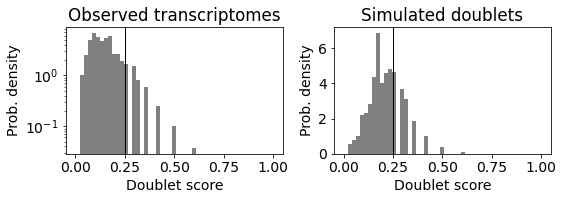

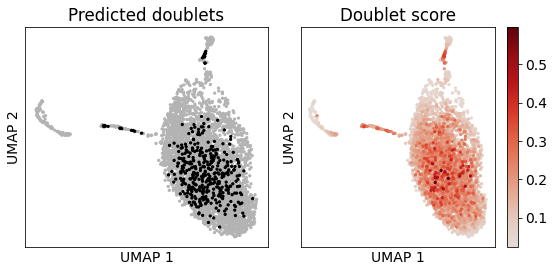

In [15]:
scrub_func("E197-1", save=True, thresh=0.25)

In [ ]:
scrub_func("E225-1", thresh=0.25, save=True)

Using input directory: /g/data/pq08/projects/ppgl/a5/sn_rna_seq/analysis/cellranger_hg38/intronic_counted/E225-1/outs/filtered_feature_bc_matrix


In [ ]:
scrub_func("E240", save=True)

In [ ]:
scrub_func("E243", save=True)

In [ ]:
scrub_func("P018-PGL1", save=True, thresh=0.25)

In [ ]:
scrub_func("P018-PGL3", save=True)

In [ ]:
#scrub_func("E196-1", save=True)

In [ ]:
#scrub_func("VPH36T", save=True)